# Introduction to Python utilities for LiPD files

### <font color='teal'>GraphMaker</font>

Welcome to GraphMaker.ipynb - a template for reading and analysing `LiPD` files. Currently, this notebok can be run to display the basic utilities for LiPD files, including how to read LiPD files, extract timeseries objects, filter datasets and visualise information. 

Currently, this notebook displays information for an Australian `LiPD` dataset, but you can load any files you want, just make sure to modify the code - you will be guided through this in my_functions. Lastly, all dependencies needed to run this notebook can be found in dependencies.py.

Hope you find this useful! :) 

### The code

In [1]:
from src.my_functions import *
from src.dependencies import *

In [2]:
import lipd

#### Reading LiPD files 

You can find LiPD files from online data repositories, such as  [NOAA](https://www.ncei.noaa.gov/access/paleo-search/), [LinkedEarth Wiki](http://wiki.linked.earth/Main_Page) and [PANGAEA](https://www.pangaea.de/). 
You can either download them on your platform or access them through URLs.

To read the LiPD files, there are two important functions we need to learn:

<div class="alert alert-block alert-success">
<b>lipd.readLipd(usr_path=)</b> </div>

This function will read the LiPD files.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Parameters:**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;usr_path: path to the file or directory 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Returns:**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Metadata


<div class="alert alert-block alert-success">
<b>lipd.extractTs(d, chron=False)</b> </div>

This function will create an array of dictionaries contained within variable d. These are the time series extracted from the LiPD files - each file can have multiple proxies that are measured, and therefore, multiple time series.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Parameters:**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;d (dict): Metadata  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;chron (bool): chronData time series

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Returns:**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Time series
    
**Example**

In [3]:
path = 'C:/Users/anast/Desktop/OregonCaves.Ersek.2012.lpd'
#Specify the path to the file or directory of your choosing - this file is available under Resources
data = lipd.readLipd(usr_path = path)
ts = lipd.extractTs(data)

Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: OregonCaves.Ersek.2012.lpd
Finished read: 1 record
extracting paleoData...
extracting: OregonCaves.Ersek.2012
Created time series: 5 entries


It will be useful here to print out the keys contained within one of the time series, to understand what we are dealing with a little bit better. You can do this using:

<div class="alert alert-block alert-success">
<b>lipd.viewTs(ts)</b> </div>

This function will return the contents of the time series defined above.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Parameters:**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;usr_path: ts(dict): the time series entry

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Returns:**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; text

**Example**


In [4]:
lipd.viewTs(ts) #This will show the first entry

It looks like you input a full time series. It's best to view one entry at a time.
I'll show you the first entry...

ROOT
archiveType : Speleothem
dataSetName : OregonCaves.Ersek.2012
googleMetadataWorksheet : oah5cdp
googleSpreadSheetKey : 1dNlV7YIdb74sYh8m8L8kjQjs9KtHWjOnImINFdtfZo0
tagMD5 : _NaN_
lipdVersion : 1.3

PUBLICATION
pub1_author : Ersek, Vasile; Clark, Peter U.; Mix, Alan C.; Cheng, Hai; Lawrence Edwards, R.
pub1_citeKey : FTUWIGTV
pub1_dataUrl : doi.org
pub1_doi : 10.1038/ncomms2222
pub1_issue : 1
pub1_journal : Nature Communications
pub1_pages : 1219
pub1_pubDataUrl : doi.org
pub1_publisher : Springer Science and Business Media LLC
pub1_title : Holocene winter climate variability in mid-latitude western North America
pub1_type : article-journal
pub1_volume : 3
pub1_year : 2012
pub2_pubDataUrl : Manually Entered

GEO
geo_meanLon : -123.416
geo_meanLat : 42.083
geo_meanElev : 1390.0
geo_type : Point
geo_siteName : Oregon Caves
geo_subRegion : WNA
geo_countryOcean : North A

#### Plotting
By looking at the output of the above function, we can now identify the variables we need for plotting the data series contained within the file. We can also display the time series using the following function:

<div class="alert alert-block alert-success">
<b>make_plots(ts)</b> </div>

This function filters the time series data and returns time series plots. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Parameters:**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ts (list): the extracted LiPD time series

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Returns:**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; plt.show (plot) 

Both age and year available - selecting years for the x-axis
AD
Both age and year available - selecting years for the x-axis
AD
Both age and year available - selecting years for the x-axis
AD
Both age and year available - selecting years for the x-axis
AD
Both age and year available - selecting years for the x-axis
AD


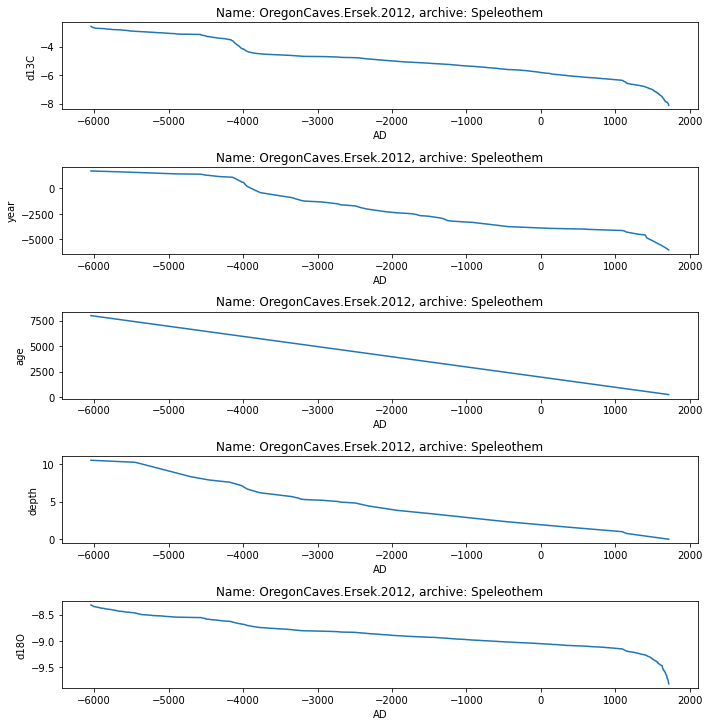

In [5]:
make_plots(data, ts)

This works well when dealing with only one file, but becomes less useful when dealing with a large number of files. To better access information from large datasets, we can convert the data contained within the LiPD files into an Excel document.

There are some LiPD functions that can help us do this, but unfortunately, not every `Lipd` file will have been formatted in the same way, so there is some tweaking we need to do first.

The functions used below below have been written to handle large datasets that contain common errors, such as duplicate variables, but the error handling is not exhaustive. If you find any more in your dataset, make sure to tweak the code to handle them.

#### Summarizing

Let's start by loading a large dataset:

In [6]:
path = 'C:/Users/anast/Desktop/Aus_LiPD_data'
#Specify the path to the file or directory of your choosing - this file is available under Resources
data = lipd.readLipd(usr_path = path)
ts = lipd.extractTs(data)

Disclaimer: LiPD files may be updated and modified to adhere to standards

Found: 359 LiPD file(s)
reading: 10_MAG01D (2022_02_10 05_00_28 UTC).lpd
reading: 11_HKO01B (2022_02_10 05_00_28 UTC).lpd
reading: 12_SNH01A (2022_02_10 05_00_28 UTC).lpd
reading: 13_NMI01B (2022_02_10 05_00_28 UTC).lpd
reading: 146_01papu02a (2022_02_10 05_00_28 UTC).lpd
reading: 147_01papu03a (2022_02_10 05_00_28 UTC).lpd
reading: 14_CID01A (2022_02_10 05_00_28 UTC).lpd
reading: 156_DuncanPinkPineNZ2010 (2022_02_10 05_00_28 UTC).lpd
reading: 157_DArrigoStewartIsland1996 (2022_02_10 05_00_28 UTC).lpd
reading: 158_2Bd13C (2022_02_10 05_00_28 UTC).lpd
reading: 159_2Bd13Cave (2022_02_10 05_00_28 UTC).lpd
reading: 15_SMI01C (2022_02_10 05_00_28 UTC).lpd
reading: 160_2Bd18O (2022_02_10 05_00_28 UTC).lpd
reading: 161_2Bd18Oave (2022_02_10 05_00_28 UTC).lpd
reading: 162_3Cd13C (2022_02_10 05_00_28 UTC).lpd
reading: 163_3Cd13Cave (2022_02_10 05_00_28 UTC).lpd
reading: 164_3Cd18O (2022_02_10 05_00_28 UTC).lpd
reading: 1

Now, let's create a table to summarize our dataset.

We can do this using the following function: 

<div class="alert alert-block alert-success">
<b>make_table(data)</b> </div>

This function contains the code needed to tabulate the information contained in the LiPD dataset 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Parameters:**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;data (dict): the LiPD file data

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Returns:**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; CSV table

In [7]:
make_table(data)

,Archive Type,Proxy Type,Minimum Age,Maximum Age,Longitude,Latitude,Max Resolution,Min Resolution
Dataset Name,,,,,,,,
10_MAG01D,Coral,Luminescence,1814.000,1985.000,146.870,-19.1500,1.000000,1.000000
11_HKO01B,Coral,Luminescence,1661.000,1984.000,148.950,-20.0700,1.000000,1.000000
12_SNH01A,Coral,Luminescence,1820.000,1991.000,148.900,-20.1000,1.000000,1.000000
13_NMI01B,Coral,Luminescence,1882.000,1983.000,148.800,-20.2300,1.000000,1.000000
146_01papu02a,Coral,Delta-oxygen-18,1884.542,1993.042,144.883,-4.1500,-0.250000,0.250000
...,...,...,...,...,...,...,...,...
GIK18471_1,marine sediment,benthic.MgCa,NaN,NaN,129.983,-9.3665,6.603659,0.309143
GIK18471_1,marine sediment,benthic.d18O,NaN,NaN,129.983,-9.3665,5.321078,0.364350
GIK18471_1,marine sediment,benthic.d18O,NaN,NaN,129.983,-9.3665,3.438247,0.300683


Looks good - but we are not done! There are more meaningful ways to display this data.

Let's start by plotting the data on a temporal scale:
#### Plotting

<div class="alert alert-block alert-success">
<b>make_temporal_map(data)</b> </div>

This function makes the temporal graph.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Parameters:**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;data (dict): the LiPD file data

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Returns:**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; matplotlib figure


In [8]:
#You can modify the temporal extent you want to display
min_year =  0
max_year = 2022
temporal_extent = [min_year, max_year]

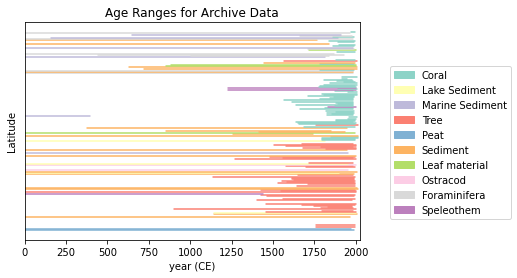

In [9]:
make_temporal_map(data, temporal_extent)

#### Making a map 

Plotting the data on a spatial scale is just as useful for visualising.
In this example, we are using cartopy to make the map, which makes it easy to edit it whichever way you need. 

Guides on how to modify the map are available here: [scitools](https://scitools.org.uk/cartopy/docs/latest/getting_started/index.html).

<div class="alert alert-block alert-success">
<b>make_spatial_map(data)</b> </div>

This function makes the spatial graph.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Parameters:**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;data (dict): the LiPD file data

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Returns:**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; matplotlib figure

In [10]:
#Define the map extent 
lat0 = -60  ; lat1 = 10
lon0 =  100; lon1 = 180

map_extent = [lon0, lon1, lat0, lat1]

530


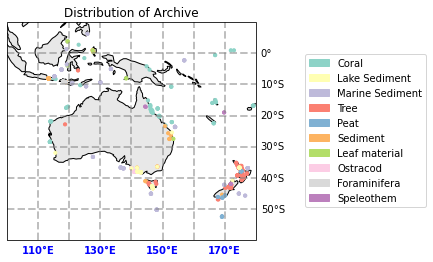

In [11]:
make_spatial_map(data, map_extent)

If you're writing a paper, knowing how to make these figures will be useful :) 

#### Filtering

However, in paleoclimate research, scientists are usually interested in data from a particular temporal or spatial scale, so when dealing with large datasets it is important to know how to filter. We can do this easily using the following function:

<div class="alert alert-block alert-success">
<b>lipd.filterTs(ts, expression)</b> </div>

This function will filter the data and create a new time series accordingly.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Parameters:**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; expression(Str): Extression  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ts(list): time series 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Returns:**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; new_ts(list): filtered time series 

**Example:** 

In [12]:
# new_ts = lipd.filterTs(ts, 'geo_meanLat < 0') #Filtering for files below 0 latitude (this covers Oceania)
# new_ts = lipd.filterTs(ts, 'archiveType == coral') #Filtering for archives 
new_ts = lipd.filterTs(ts, 'paleoData_variableName == Sr/Ca') #Filtering for proxies 

Found 2 matches from 2988 columns


Finally, let's plot them:

Both age and year available - selecting years for the x-axis
AD
Both age and year available - selecting years for the x-axis
AD


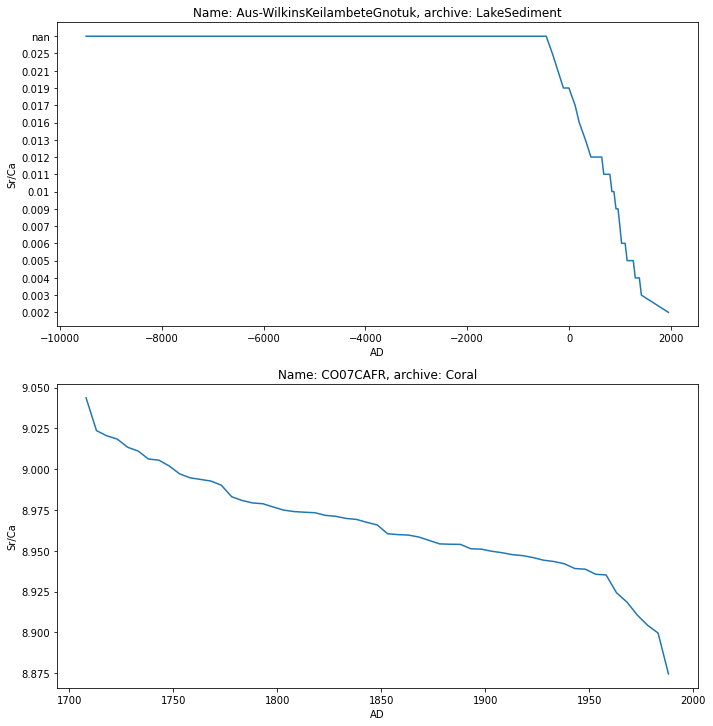

In [13]:
make_plots(data, new_ts)